In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4
print('Using xarray version: ', xr.__version__)
print('Using netCDF4 version: ', netCDF4.__version__)

%config InlineBackend.figure_format='retina'

Using xarray version:  2025.1.1
Using netCDF4 version:  1.7.2


In [3]:
ds = xr.tutorial.open_dataset("air_temperature_gradient")
ds


<xarray.Dataset> Size: 62MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float64 31MB ...
    dTdx     (time, lat, lon) float32 15MB ...
    dTdy     (time, lat, lon) float32 15MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.  , 230.64, 240.28, 249.92, 259.56, 269.2 , 278.84, 288.48,
        298.12, 307.76, 317.4 ]),
 <BarContainer object of 10 artists>)

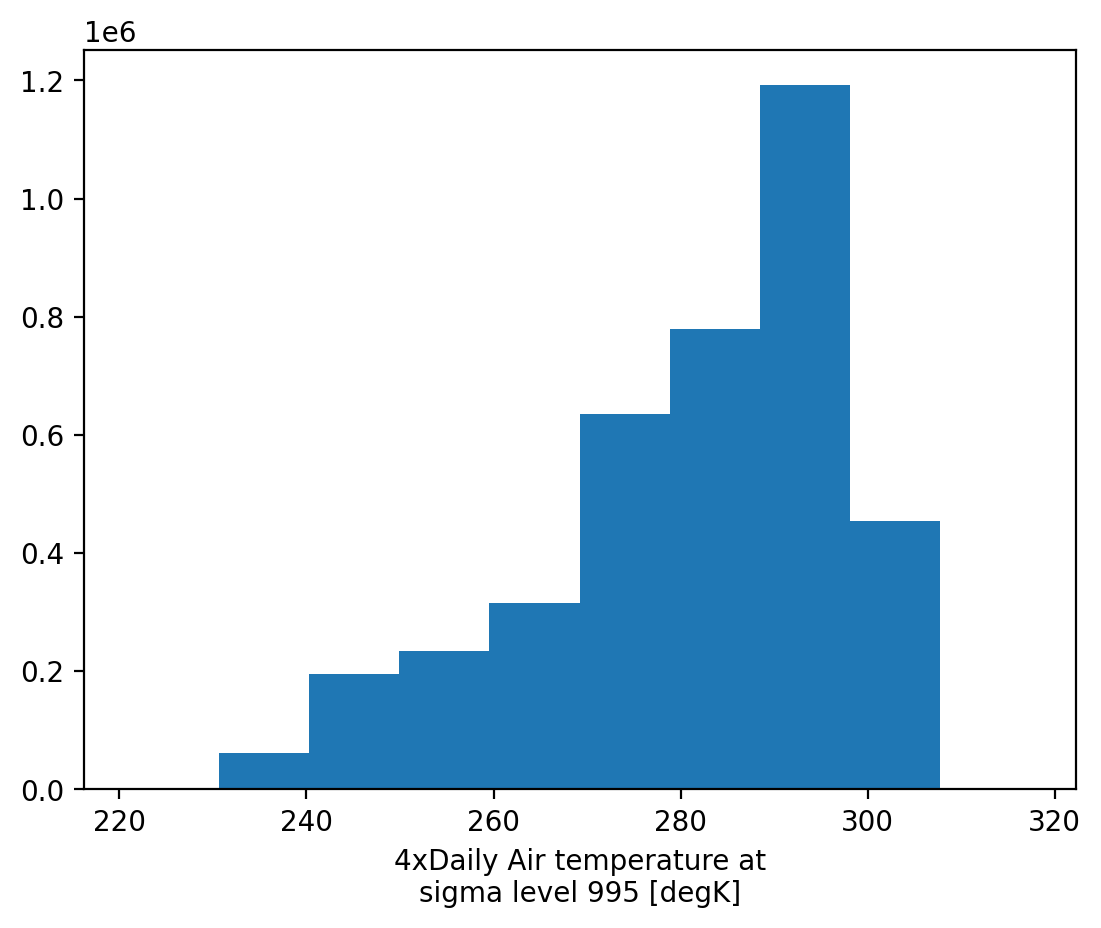

In [4]:
ds.Tair.plot()

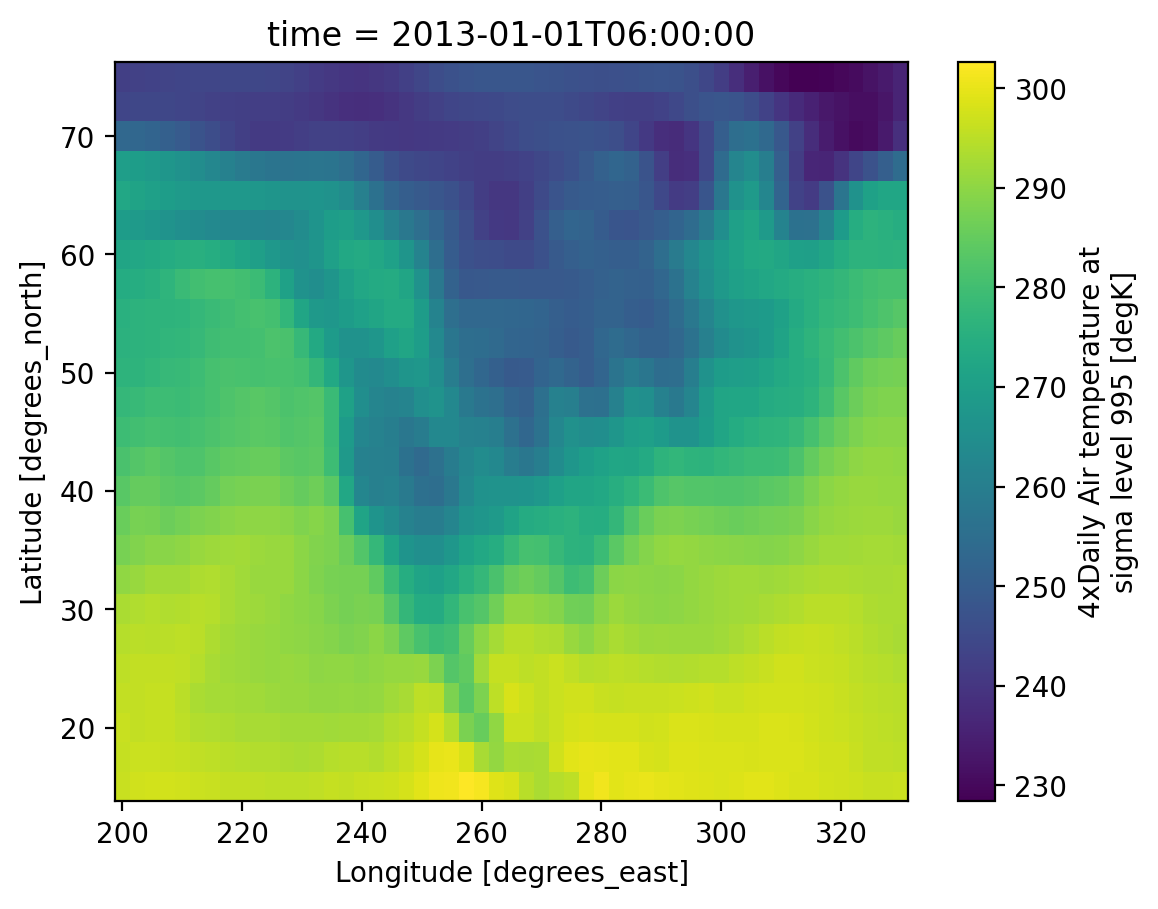

In [5]:
ds.Tair.isel(time=1).plot()

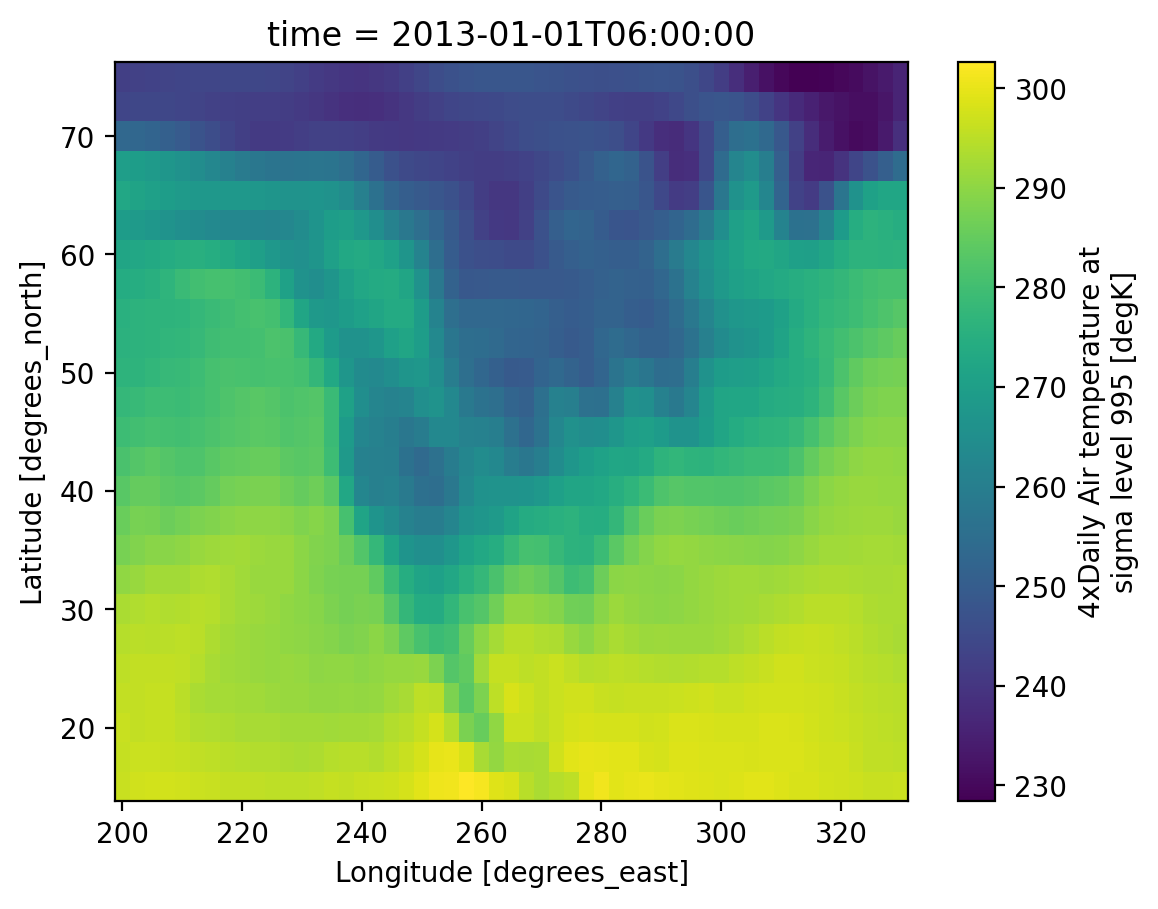

In [6]:
ds.Tair.isel(time=1).plot.pcolormesh()

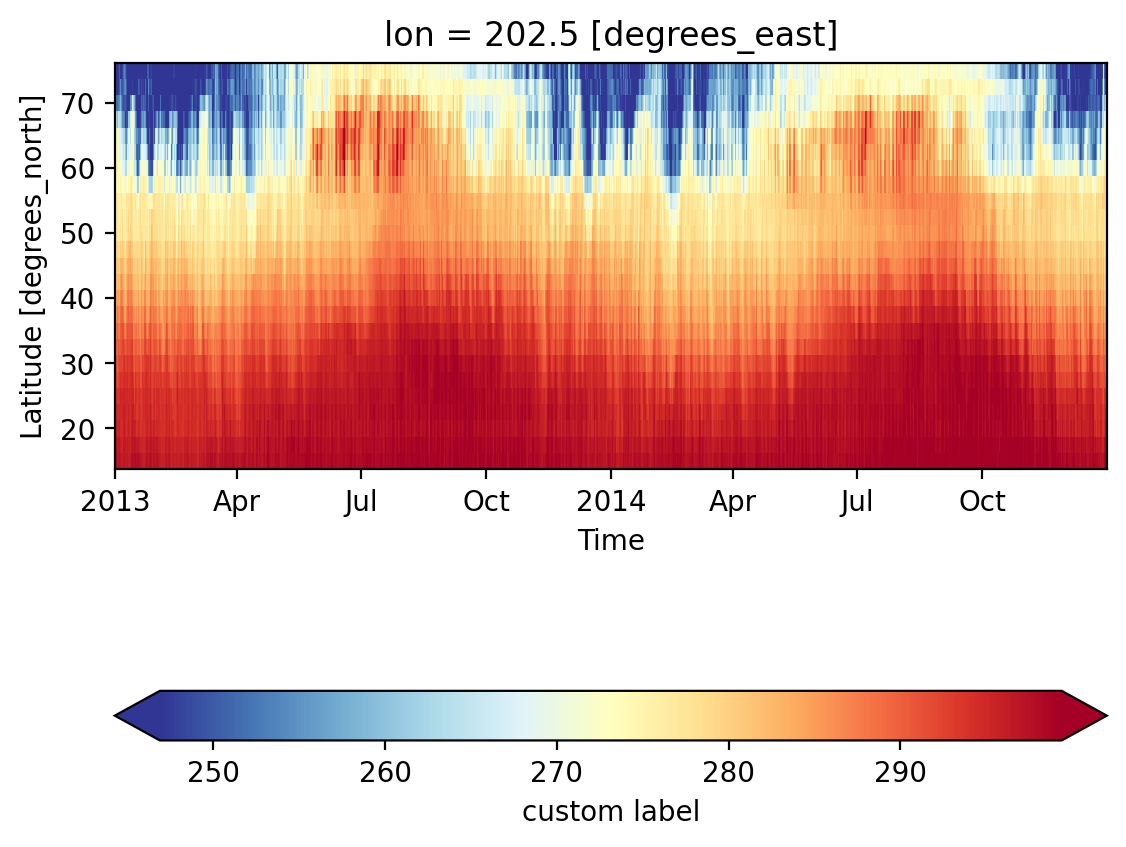

In [7]:
ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,  # choose colormap
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)

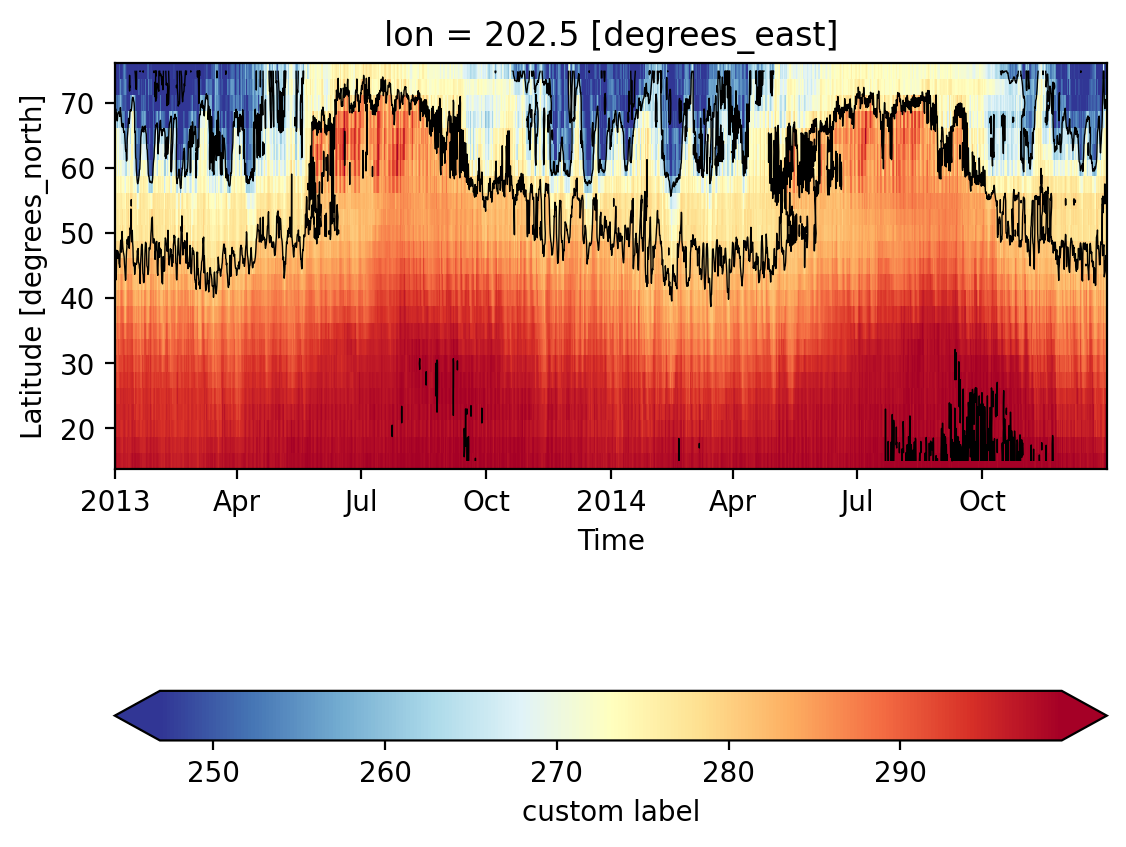

In [8]:
ds.Tair.isel(lon=1).plot.pcolormesh(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,  # choose colormap
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)
ds.Tair.isel(lon=1).plot.contour(
    x="time",  # coordinate to plot on the x-axis of the plot
    levels=5,  # number of contour levels
    colors="k",  # color of contour lines
    linewidths=0.5,  # width of contour lines
)

# 1D line plots

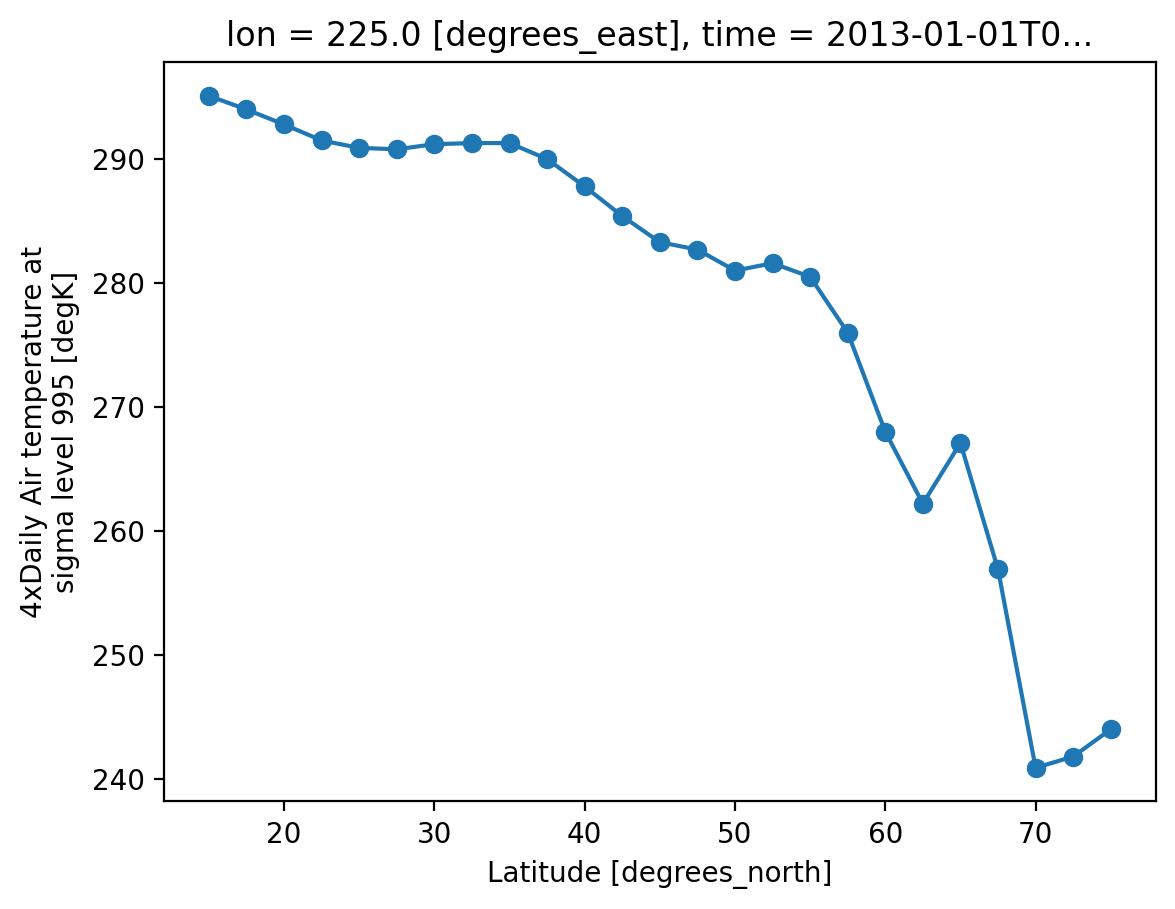

In [9]:
ds.Tair.isel(time=1, lon=10).plot.line(marker="o")

### Multiple lines with hue

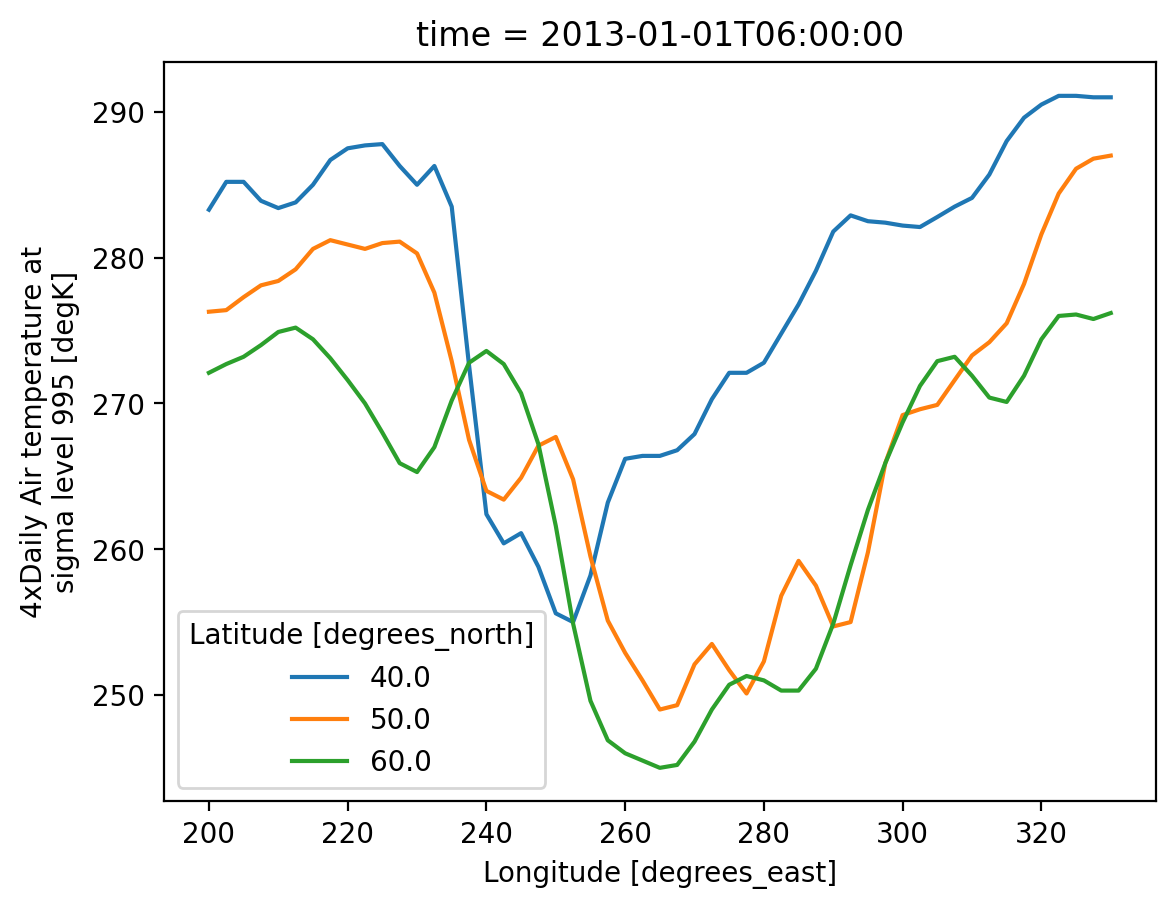

In [10]:
ds.Tair.isel(time=1).sel(lat=[40, 50, 60], method="nearest").plot(x="lon", hue="lat")

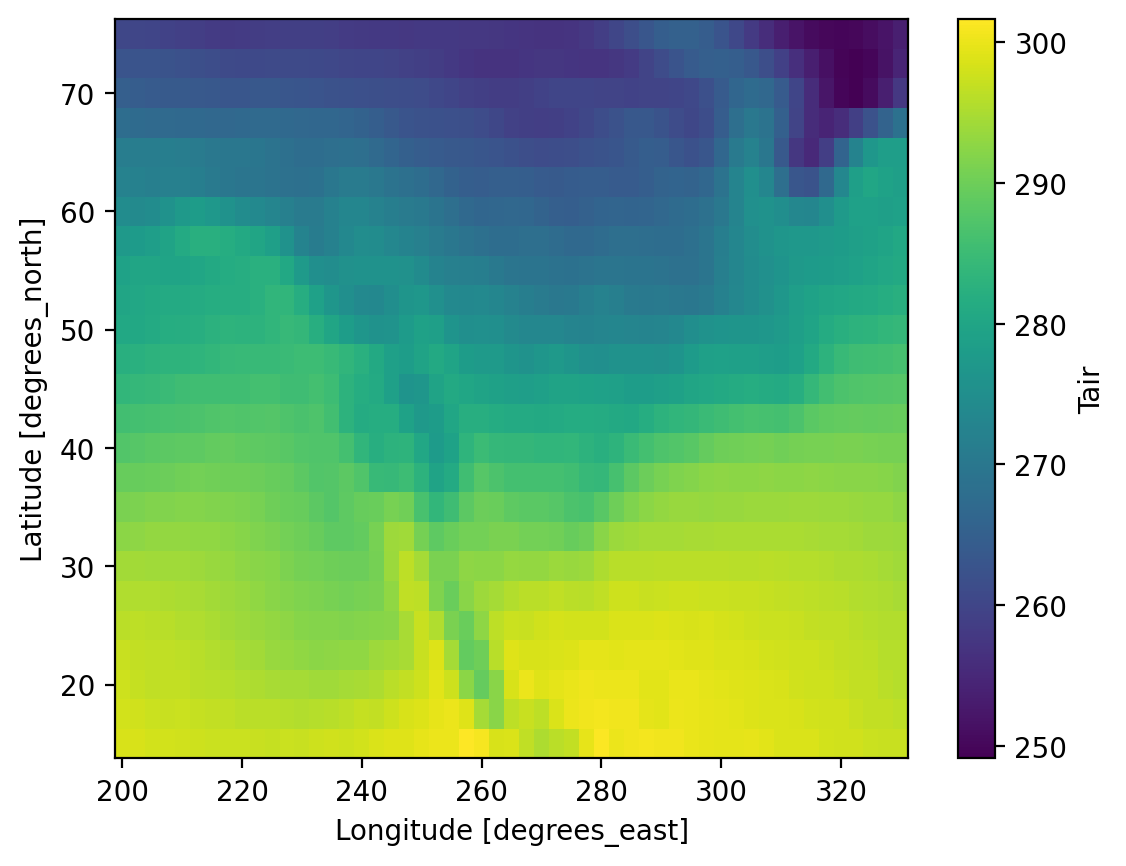

In [11]:
ds.mean("time").Tair.plot()

# Faceting
Faceting is the art of presenting “small multiples” of the data. It is an effective way of visualizing variations of 3D data where 2D slices are visualized in a panel (subplot) and the third dimensions is varied between panels (subplots).

In [13]:
monthly_means = ds.groupby("time.month").mean()
# xarray's groupby reductions drop attributes. Let's assign them back so we get nice labels.
monthly_means.Tair.attrs = ds.Tair.attrs
print(monthly_means)

<xarray.Dataset> Size: 255kB
Dimensions:  (month: 12, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Tair     (month, lat, lon) float64 127kB 246.3 246.4 246.2 ... 297.6 297.5
    dTdx     (month, lat, lon) float32 64kB 5.082e-07 -9.469e-07 ... -1.043e-07
    dTdy     (month, lat, lon) float32 64kB -9.553e-06 -9.605e-06 ... -3.872e-06
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...


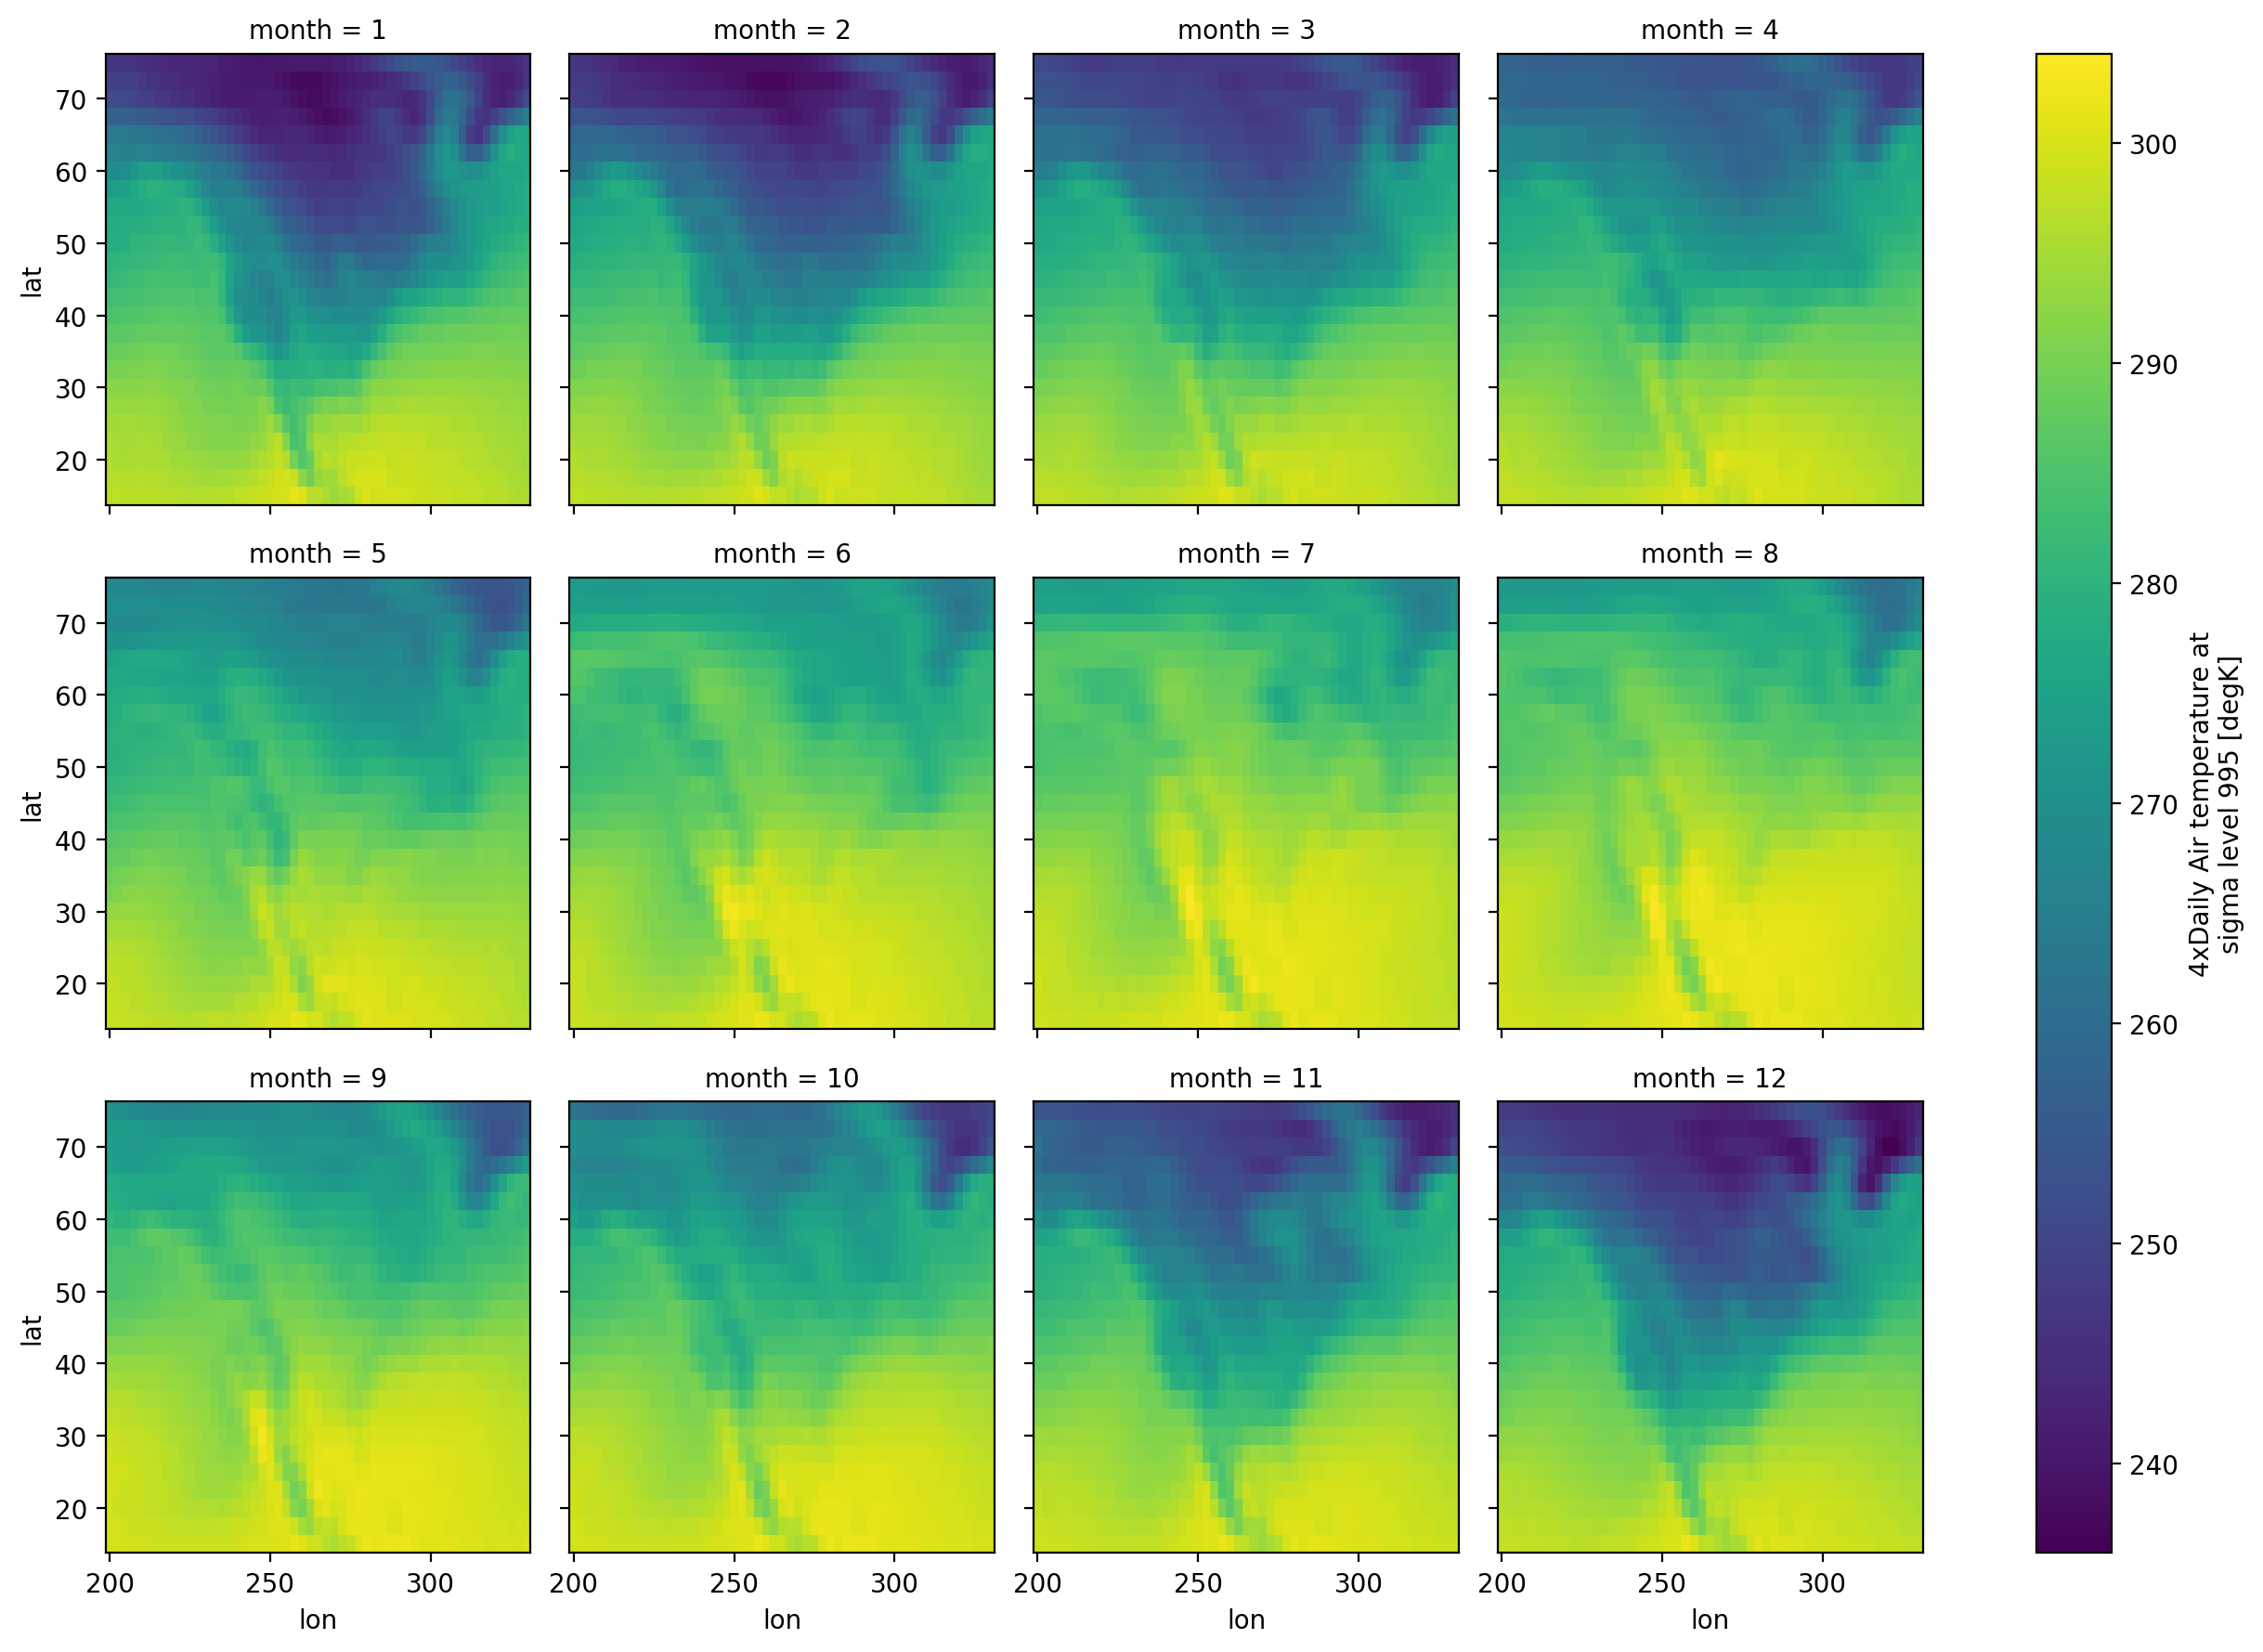

In [14]:
fg = monthly_means.Tair.plot(
    col = "month",
    col_wrap=4,
)

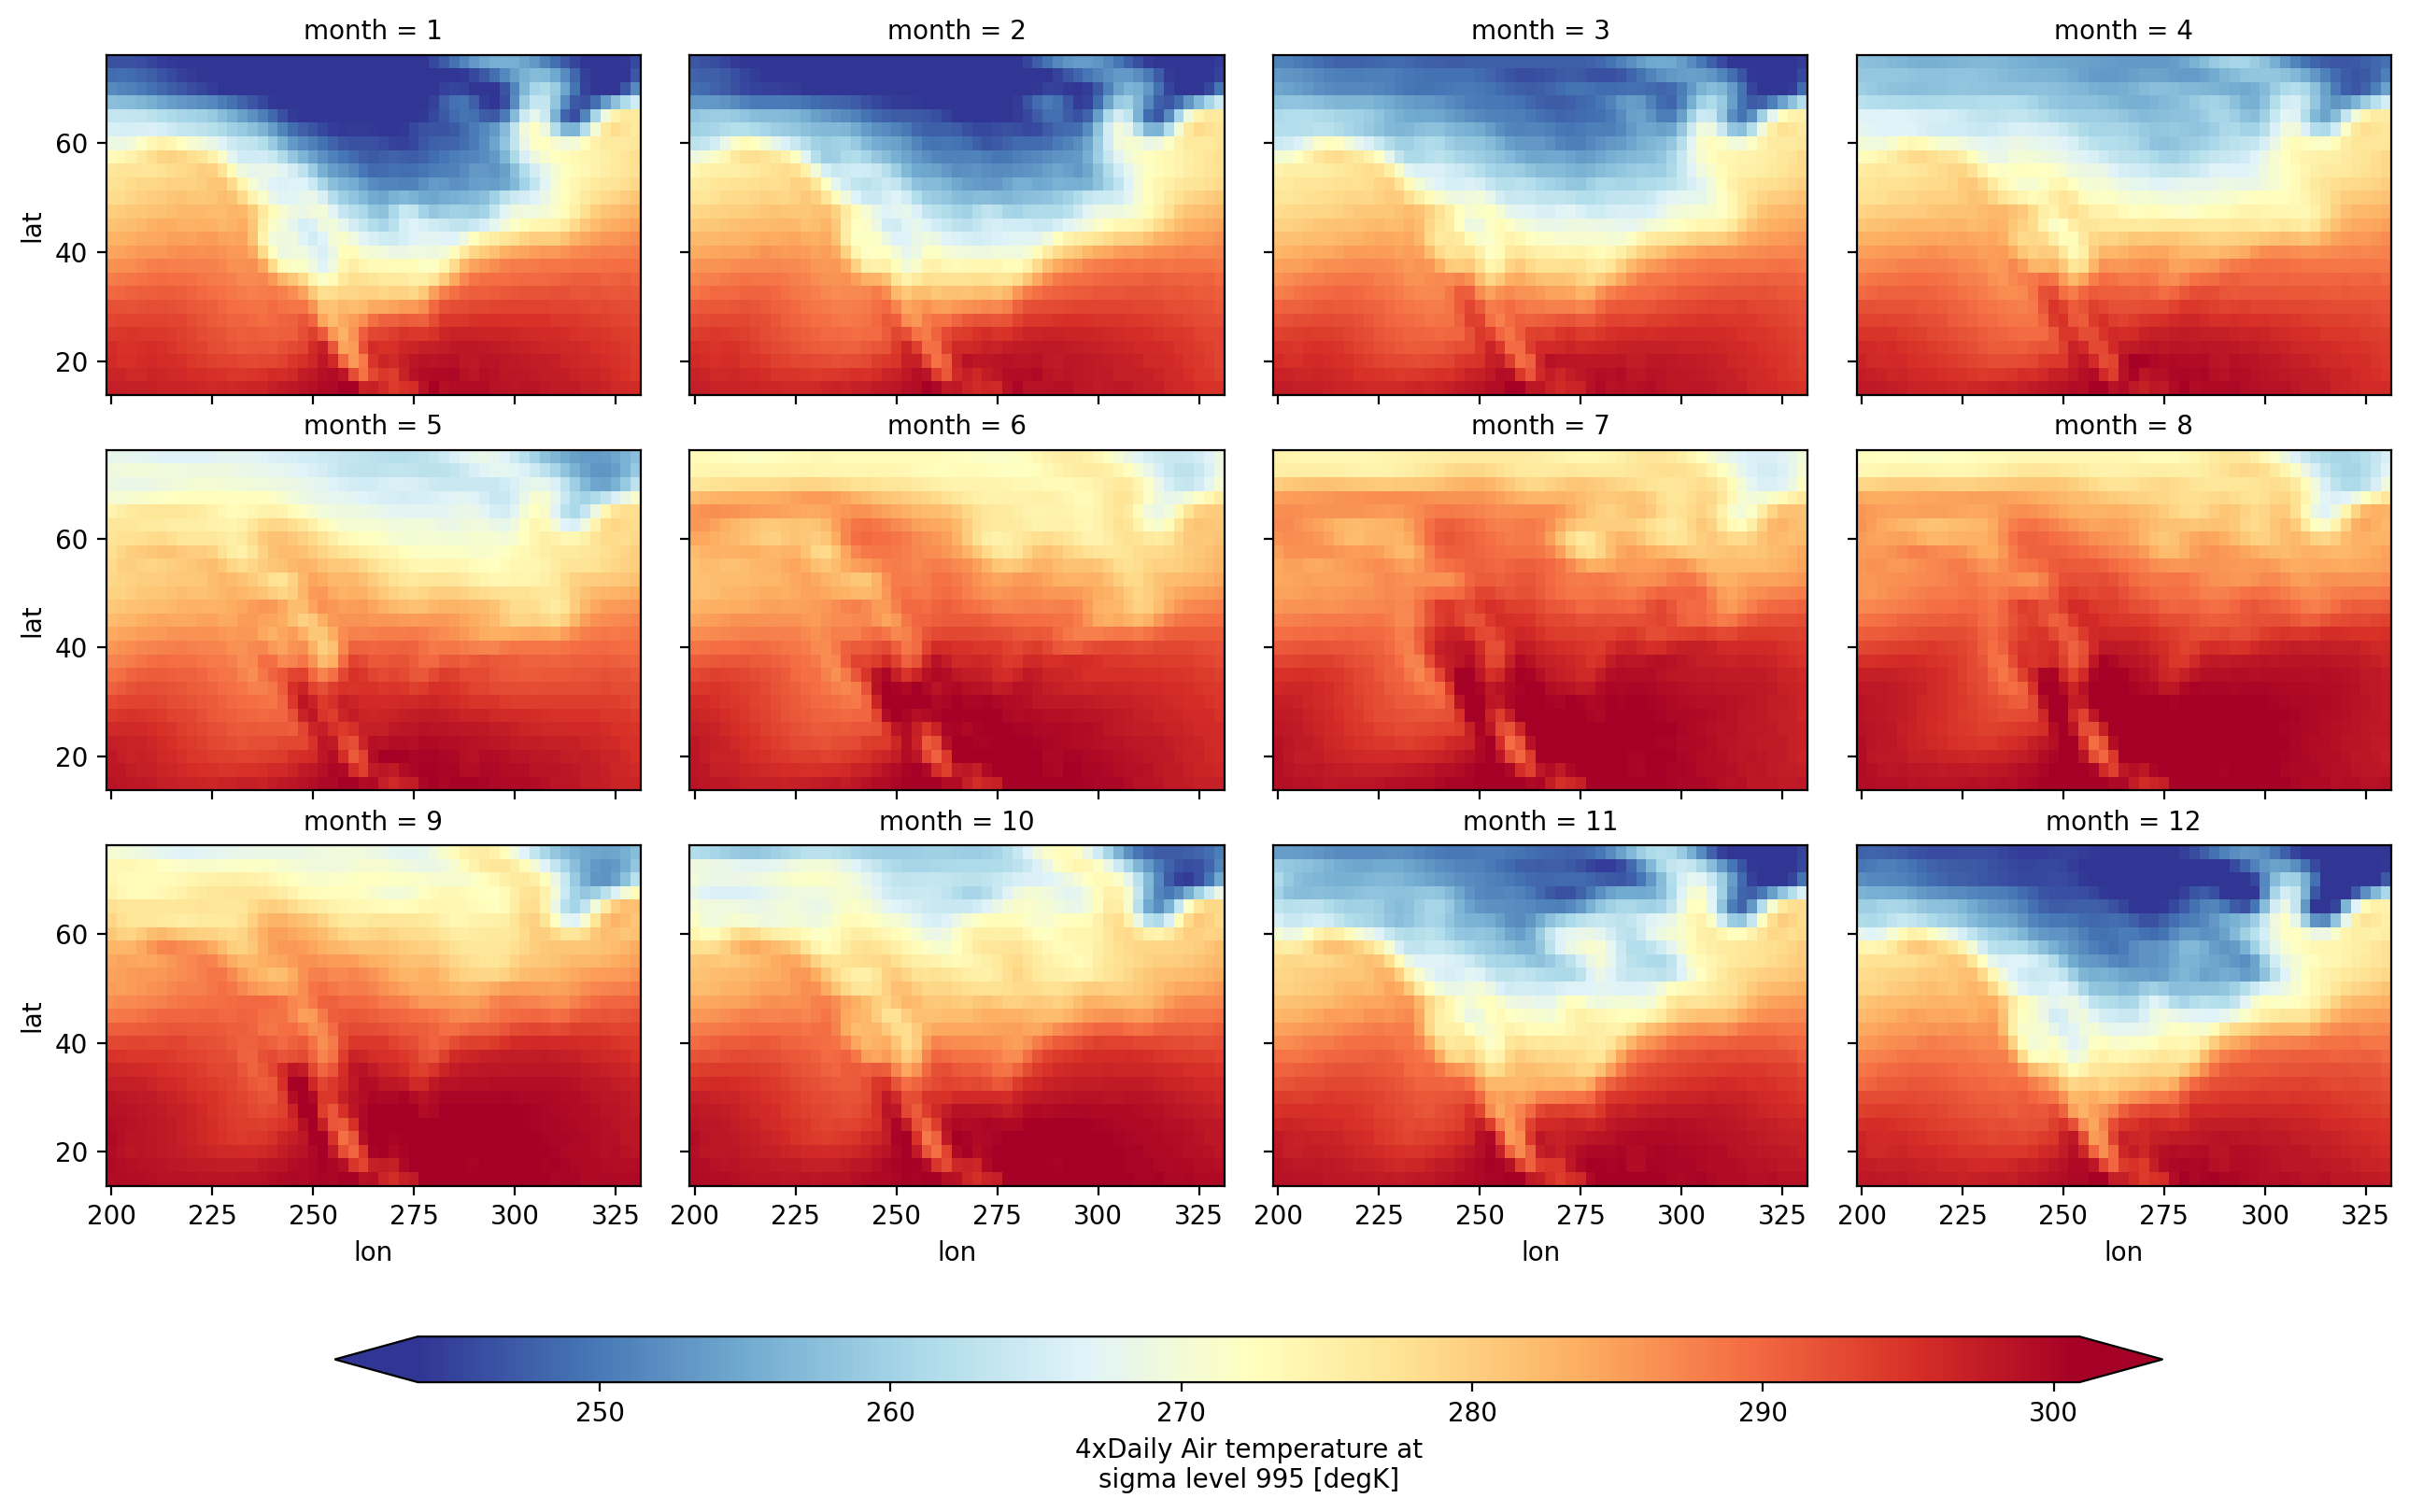

In [15]:
fg = monthly_means.Tair.plot(
    col = "month",
    col_wrap=4,
    # the remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,  
        "pad": 0.1,
    },
)

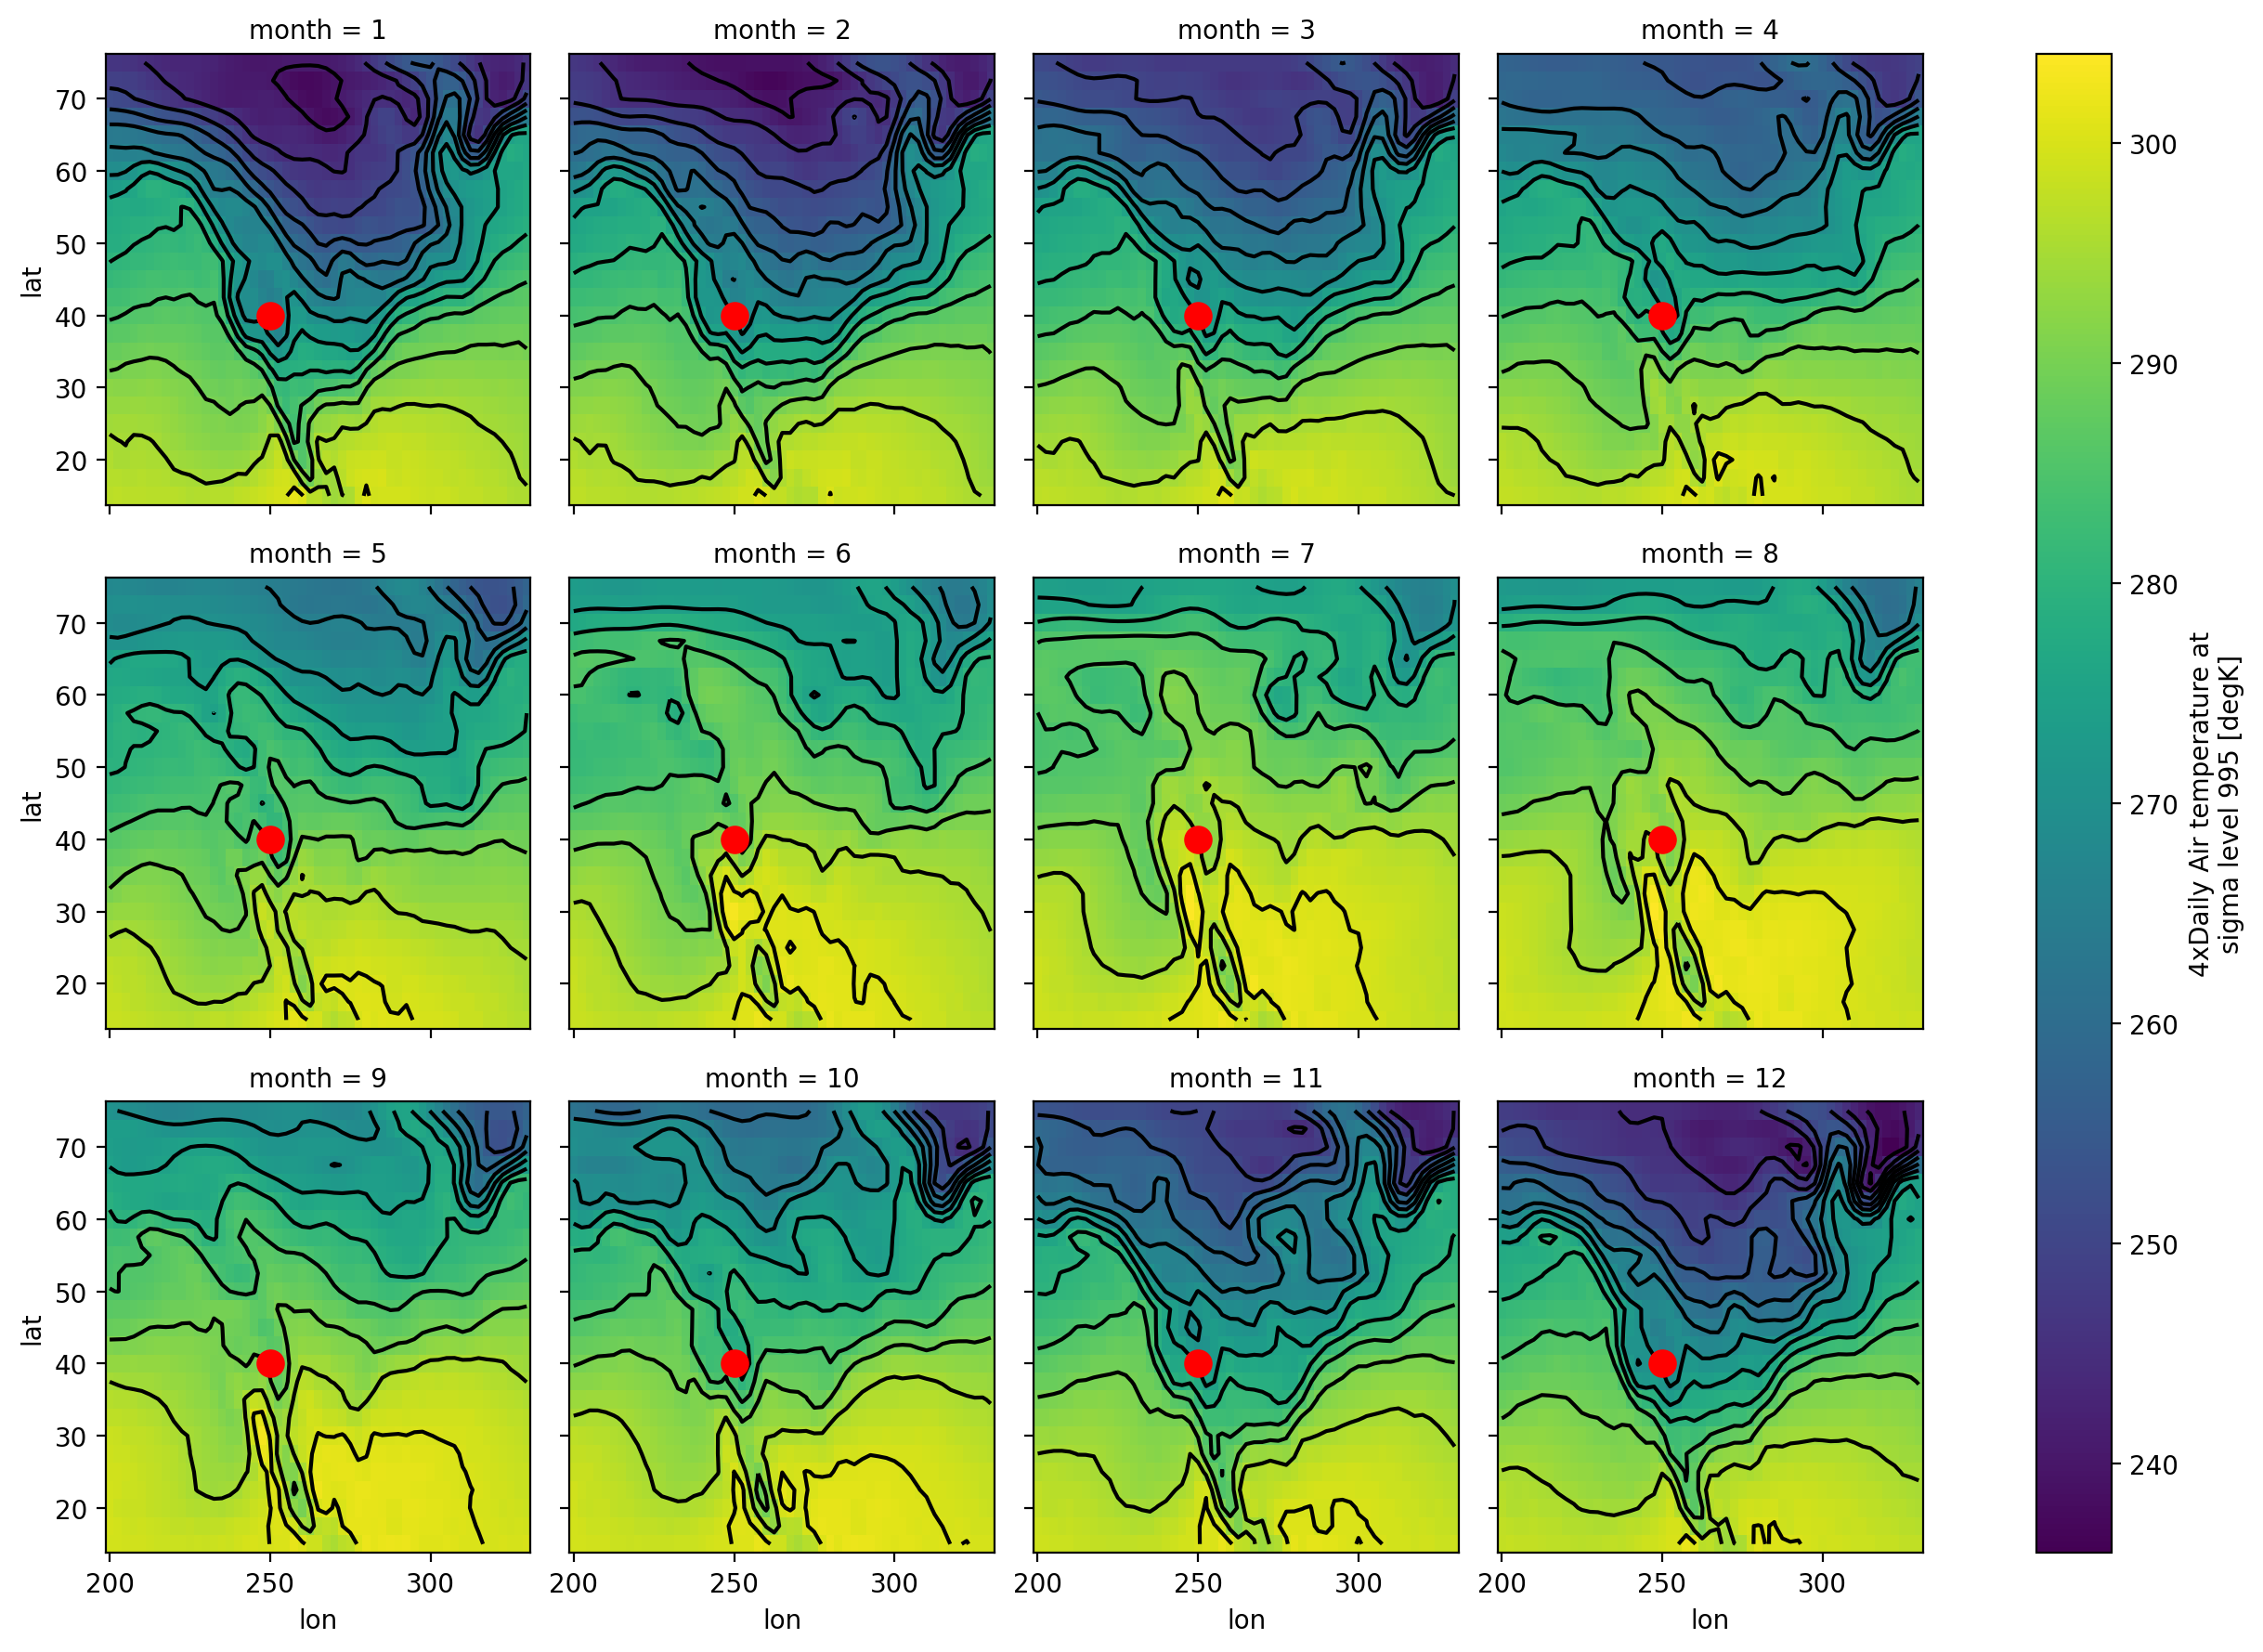

In [20]:
# modyfying all facets
fg = monthly_means.Tair.plot(col="month", col_wrap=4)

# Use this to plot contours on each panel
# Note that this plotting call uses the original DataArray gradients
fg.map_dataarray(xr.plot.contour, x="lon", y="lat", colors="k", levels=15, add_colorbar=False)

# Add a point (or something else) to each panel
fg.map(lambda: plt.plot(250, 40, markersize=10, marker="o", color="r"))

In [21]:
# Faceting multiple DataArrays

gradients = monthly_means[["dTdx", "dTdy"]].to_array("gradient")
gradients

<xarray.DataArray (gradient: 2, month: 12, lat: 25, lon: 53)> Size: 127kB
array([[[[ 5.08173684e-07, -9.46942578e-07, -4.03479180e-06, ...,
           1.00858488e-05,  1.81633768e-05,  2.19007525e-05],
         [ 6.02189118e-07, -8.90132014e-07, -4.25928238e-06, ...,
           1.44879168e-05,  3.15986872e-05,  3.92536967e-05],
         [-4.04702814e-06, -4.58570503e-06, -6.01438433e-06, ...,
           2.61500463e-05,  4.34150716e-05,  5.08334851e-05],
         ...,
         [-2.34571348e-06, -1.20601771e-06,  8.53055610e-07, ...,
          -1.45294723e-06, -2.20137940e-06, -2.35507150e-06],
         [-2.84735904e-07, -7.32893909e-07, -6.86845681e-07, ...,
          -1.83361863e-06, -1.57463614e-06, -2.10182111e-06],
         [ 3.16048641e-07, -1.98249467e-07, -4.91980586e-07, ...,
          -1.71716079e-06, -7.17862974e-07, -5.23411643e-07]],

        [[-3.81416953e-06, -5.11973212e-06, -8.09966514e-06, ...,
           1.27637104e-05,  1.81622308e-05,  2.02568535e-05],
         [-4.84793247e-07, -1.95023244e-06, -5.09623078e-06, ...,
           1.05404051e-05,  2.67223077e-05,  3.38635218e-05],
         [-5.29987710e-06, -5.99807481e-06, -7.59168552e-06, ...,
           2.05774650e-05,  3.87745931e-05,  4.66650490e-05],
...
          -1.65317442e-06, -2.42777446e-06, -1.94103222e-06],
         [-1.84547469e-06, -3.26857275e-06, -3.11111307e-06, ...,
          -1.44888838e-06, -2.25341228e-06, -3.15753573e-06],
         [-8.51903962e-07, -1.66222276e-06, -2.48365177e-06, ...,
          -2.15396517e-06, -2.12524083e-06, -3.46904199e-06]],

        [[-6.71428415e-06, -8.14977375e-06, -9.80123150e-06, ...,
           3.74177898e-06,  2.25041845e-07, -5.66836025e-06],
         [-7.73049214e-06, -6.68594612e-06, -6.57780447e-06, ...,
           3.23118388e-06, -1.69362568e-06, -8.46021612e-06],
         [-1.21043013e-05, -1.01668966e-05, -9.37458026e-06, ...,
          -2.60197321e-05, -3.02746539e-05, -3.18970924e-05],
         ...,
         [-1.97388658e-06, -2.87304010e-06, -2.76804826e-06, ...,
          -2.31021318e-06, -2.91697165e-06, -2.45591286e-06],
         [-2.12526766e-06, -3.82872440e-06, -3.59293290e-06, ...,
          -2.17964885e-06, -2.80768063e-06, -3.58095190e-06],
         [-1.57234820e-06, -2.31013792e-06, -2.78555922e-06, ...,
          -2.83686700e-06, -2.73794444e-06, -3.87158479e-06]]]],
      shape=(2, 12, 25, 53), dtype=float32)
Coordinates:
  * lat       (lat) float32 100B 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon       (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * gradient  (gradient) object 16B 'dTdx' 'dTdy'
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

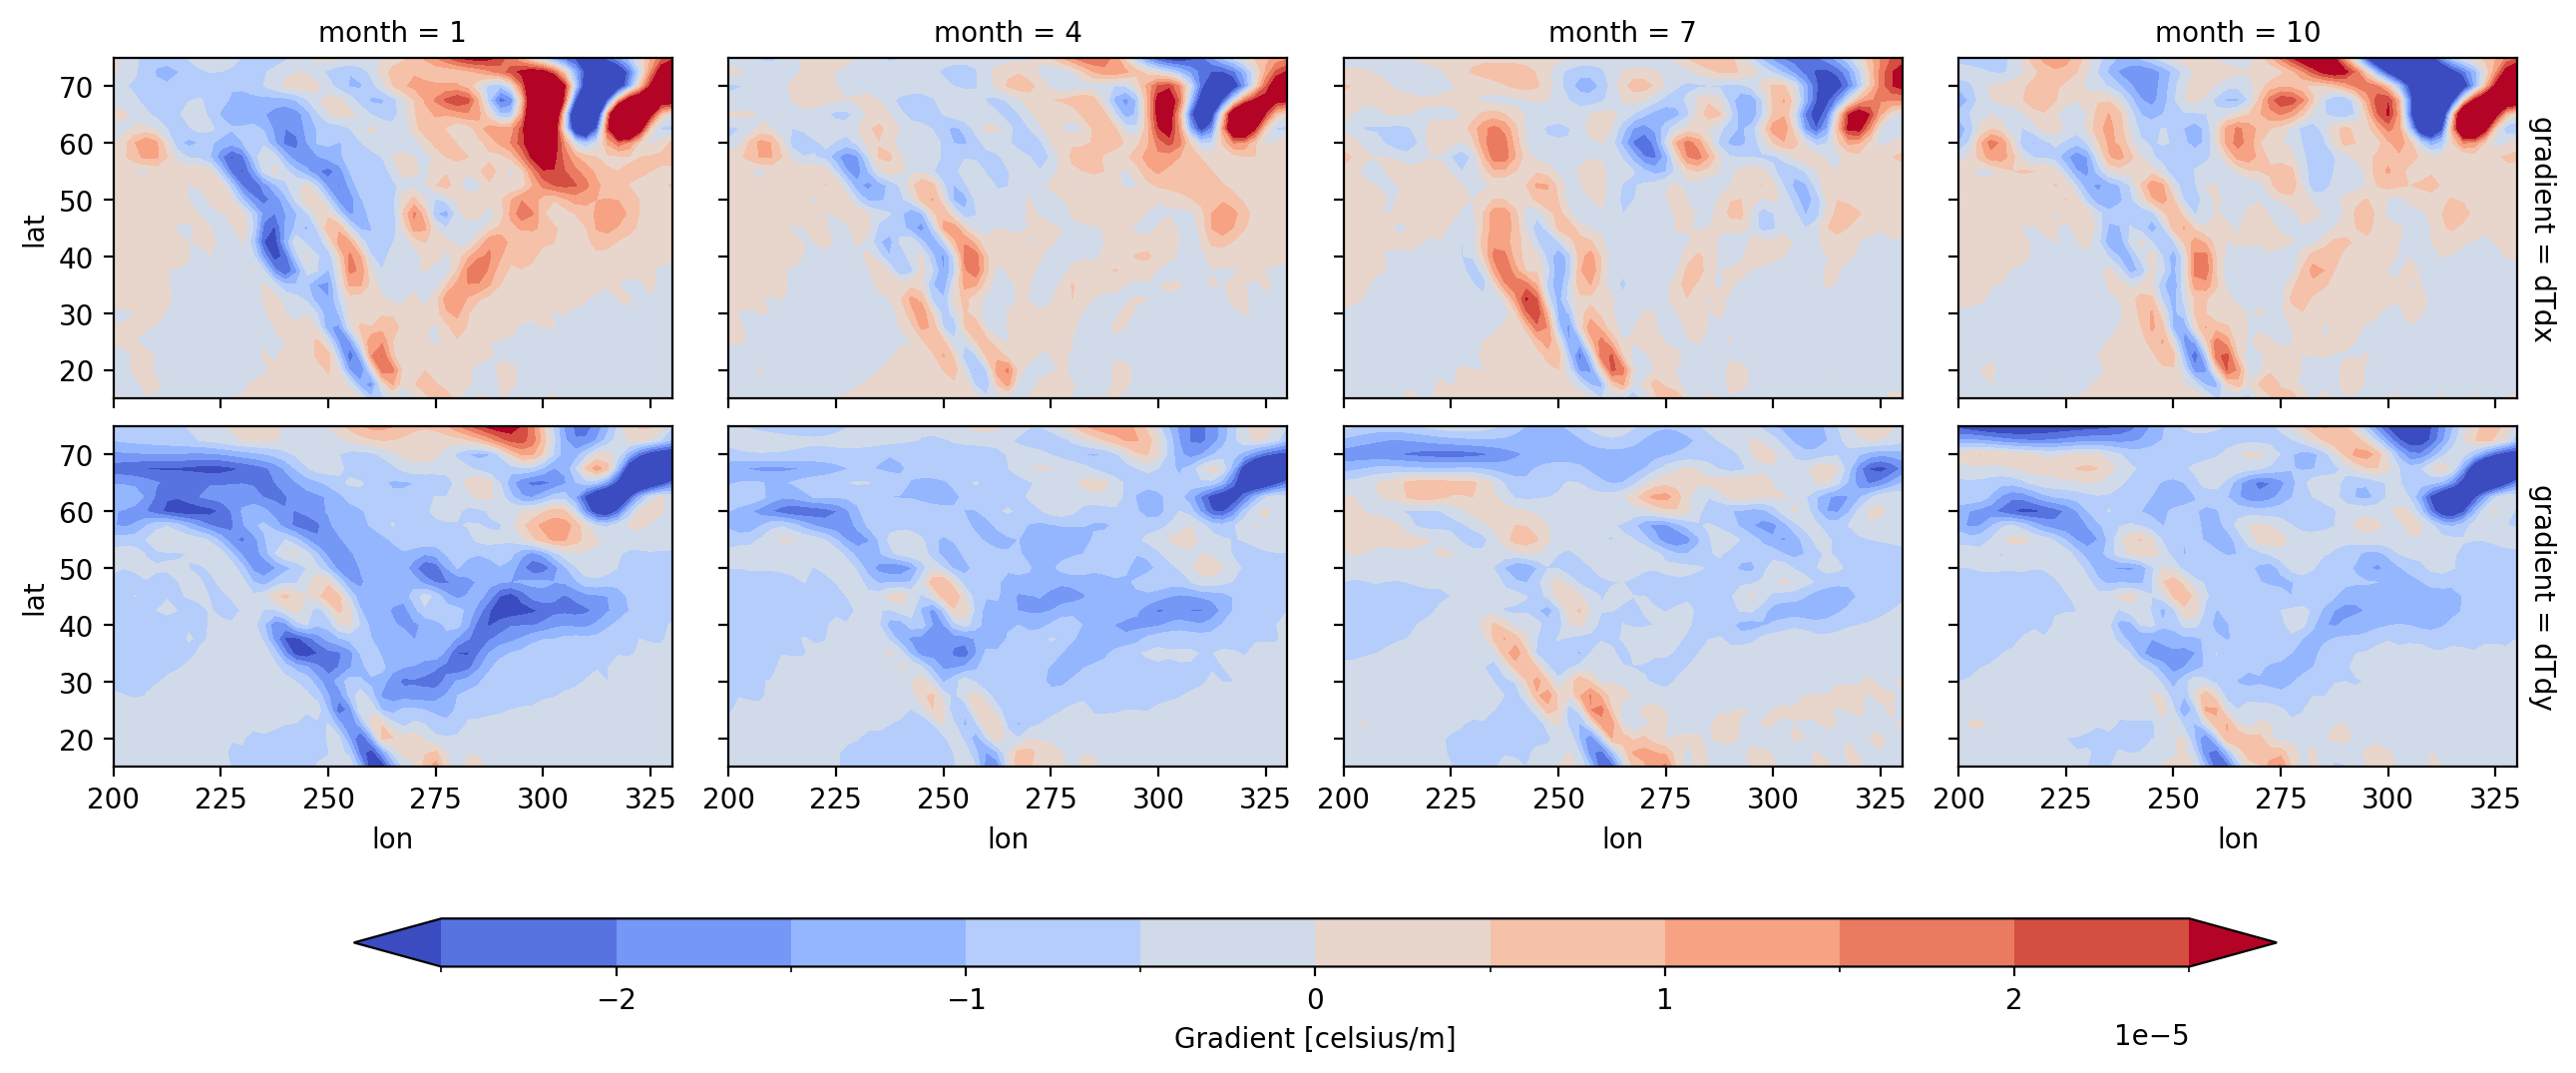

In [25]:
fg = gradients.isel(month=slice(None, None, 3)).plot.contourf(
    levels=13,
    col="month",
    row="gradient",
    robust=True,
    cmap=mpl.cm.coolwarm,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "label": "Gradient [celsius/m]",
    },
)

# Geography with Cartopy

In [26]:
import cartopy.crs as ccrs

In [28]:
ds = xr.tutorial.open_dataset("air_temperature_gradient")
monthly_means = ds.groupby("time.month").mean()
# xarray's groupby reductions drop attributes. Let's assign them back so we get nice labels.
monthly_means.Tair.attrs = ds.Tair.attrs

c:\Users\annem\miniconda3\envs\thesis\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


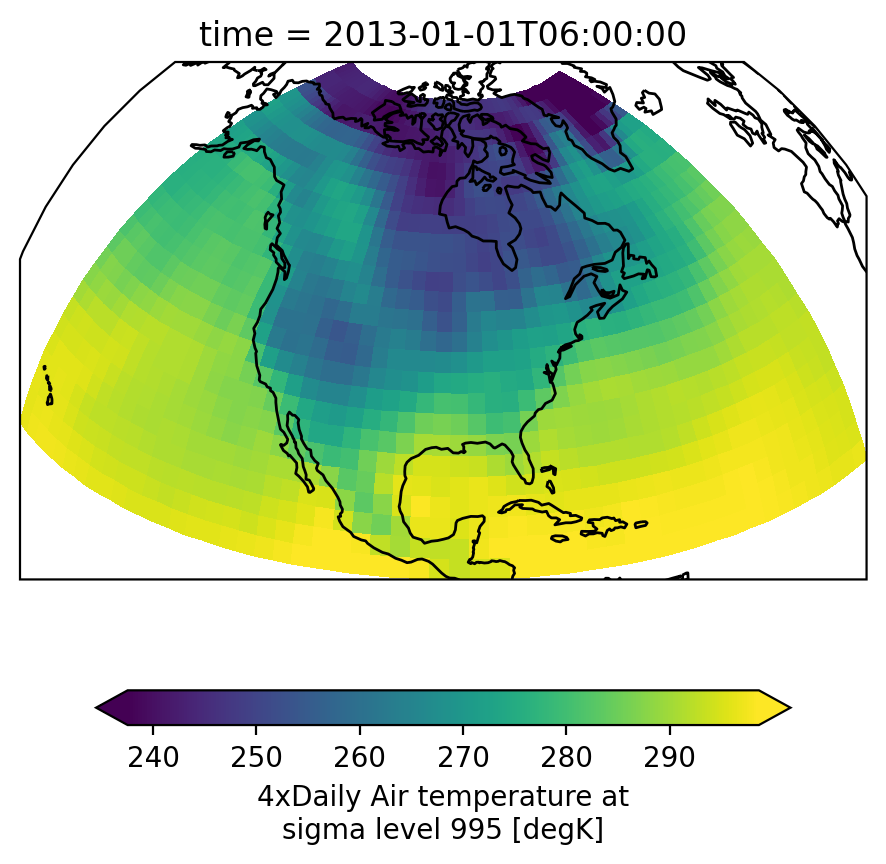

In [32]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Orthographic(-90, 30)))

ds.Tair.isel(time=1).plot(
    ax=axis,
    transform=ccrs.PlateCarree(), # this is important
    # usual xarry stuff
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,

)
axis.coastlines() # cartopy function

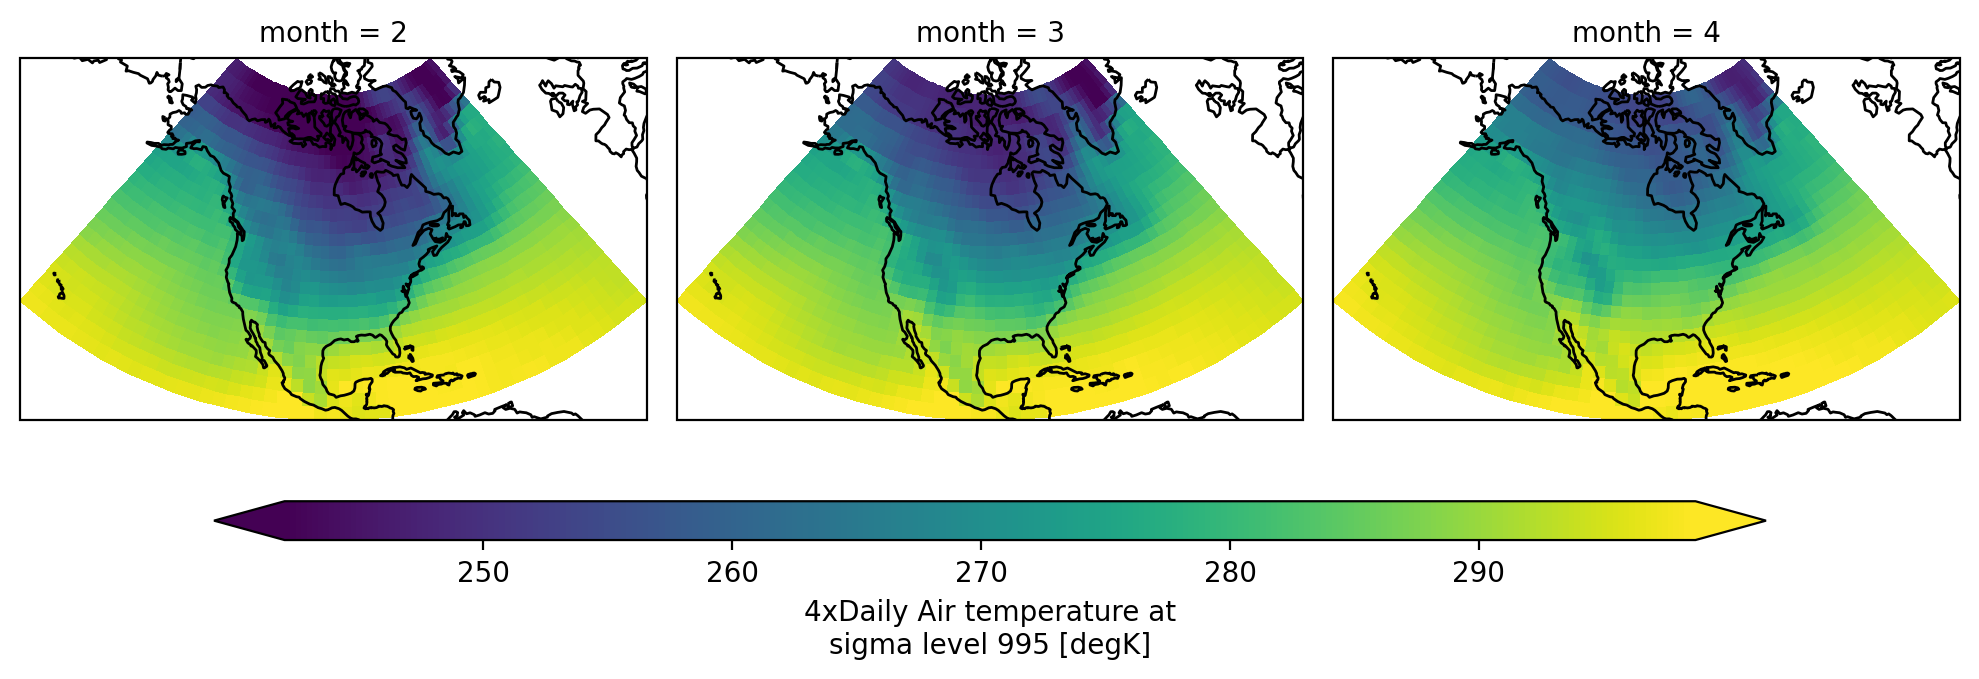

In [37]:
# Faceting maps

fg = monthly_means.Tair.isel(month=[1, 2, 3]).plot(
    col="month",
    transform=ccrs.PlateCarree(), # this is important again
    subplot_kws={"projection": ccrs.LambertConformal(central_longitude=-95, central_latitude=45)},
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.8, "aspect": 40},
    robust=True,
)

# adding a coastlines to each axis, great reason to use FacetGrid.map
fg.map(lambda: plt.gca().coastlines())